<a href="https://colab.research.google.com/github/Robin-Rego/Book_Recommendation_System/blob/main/Book_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Book Recommendation System**

# **Problem Statement**

During the last few decades, with the rise of Youtube, Amazon, Netflix, and many other such web services, recommender systems have taken more and more place in our
lives. From e-commerce (suggest to buyers articles that could interest them) to online advertisement (suggest to users the right contents, matching their preferences),
recommender systems are today unavoidable in our daily online journeys. In a very general way, recommender systems are algorithms aimed at suggesting relevant
items to users (items being movies to watch, text to read, products to buy, or anything else depending on industries). Recommender systems are really critical in some
industries as they can generate a huge amount of income when they are efficient or also be a way to stand out significantly from competitors. The main objective is to
create a book recommendation system for users

**Content**

The Book-Crossing dataset comprises 3 files.

● Users

Contains the users. Note that user IDs (User-ID) have been anonymized and map to integers. Demographic data is provided (Location, Age) if available. Otherwise, these
fields contain NULL values.

● Books


ooks are identified by their respective ISBN. Invalid ISBNs have already been removed from the dataset. Moreover, some content-based information is given (BookTitle, Book-Author, Year-Of-Publication, Publisher), obtained from Amazon Web Services. Note that in the case of several authors, only the first is provided. URLs linking
to cover images are also given, appearing in three different flavors (Image-URL-S, Image-URL-M, Image-URL-L), i.e., small, medium, large. These URLs point to the
Amazon website.


● Ratings

Contains the book rating information. Ratings (Book-Rating) are either explicit, expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit,
expressed by 0.



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import random

In [3]:
# Lets read the file
df_books = pd.read_csv("/content/drive/MyDrive/Almabetter-Project/Unsupervised ML-Book Recomendation Sys/Books.csv")
df_ratings = pd.read_csv("/content/drive/MyDrive/Almabetter-Project/Unsupervised ML-Book Recomendation Sys/Ratings.csv")
df_users = pd.read_csv("/content/drive/MyDrive/Almabetter-Project/Unsupervised ML-Book Recomendation Sys/Users.csv")

In [4]:
# first look of df_books
df_books.head(3)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...


In [5]:
# Last look of books
df_books.tail(3)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...
271359,0767409752,A Guided Tour of Rene Descartes' Meditations o...,Christopher Biffle,2000,McGraw-Hill Humanities/Social Sciences/Languages,http://images.amazon.com/images/P/0767409752.0...,http://images.amazon.com/images/P/0767409752.0...,http://images.amazon.com/images/P/0767409752.0...


In [6]:
# first look of ratings
df_ratings.head(3)

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0


In [7]:
# last look of ratings
df_ratings.tail(3)

,User-ID,ISBN,Book-Rating
1149777,276709,0515107662,10
1149778,276721,0590442449,10
1149779,276723,05162443314,8


In [8]:
#first look of users
df_users.head(3)

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN


In [9]:
#last look of users
df_users.tail(3)

,User-ID,Location,Age
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN
278857,278858,"dublin, n/a, ireland",NaN


In [10]:
# Lets check the shape
print("The shape of Books file is:",df_books.shape)
print("The shape of Ratings file is:", df_ratings.shape)
print("The shape of Users file is:",df_users.shape)

The shape of Books file is: (271360, 8)
The shape of Ratings file is: (1149780, 3)
The shape of Users file is: (278858, 3)


# Lets check for null values
1. Books Dataset

In [11]:
df_books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

**So as we can see columns like "Book-Author", "Publisher", "Image-URL-L" have null values**

In [12]:
#dropping columns containing image URLs which will not be required for analysis
df_books.drop(['Image-URL-S', 'Image-URL-M', 'Image-URL-L'],axis=1,inplace=True)

In [13]:
# Lets check for null values in publisher column
df_books.loc[df_books.Publisher.isnull(),:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN


**There are 02 NaN values in "Publisher" Column.
So lets replace that with "other"**

---



In [14]:
#Filling Nan of Publisher with others
df_books.Publisher.fillna('other',inplace=True)

In [15]:
#Simiarly lets check for null values in Book-Author column
df_books.loc[df_books["Book-Author"].isnull(),:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing


**There are 01 NaN values in "Book-Author" Column.
So lets replace that with "other"**

---



In [16]:
#Filling Nan of Publisher with others
df_books["Book-Author"].fillna('other',inplace=True)

In [47]:
df_books.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
dtype: int64

In [49]:
#Since the "Year-Of-Publication" column has non required values
df_books['Year-Of-Publication']=df_books['Year-Of-Publication'].astype('str') #Convert datatype to str
a=list(df_books['Year-Of-Publication'].unique())
a=set(a)
a=list(a)
a = [x for x in a if x is not None]
a.sort()
print(a)

['0', '1376', '1378', '1806', '1897', '1900', '1901', '1902', '1904', '1906', '1908', '1909', '1910', '1911', '1914', '1917', '1919', '1920', '1921', '1922', '1923', '1924', '1925', '1926', '1927', '1928', '1929', '1930', '1931', '1932', '1933', '1934', '1935', '1936', '1937', '1938', '1939', '1940', '1941', '1942', '1943', '1944', '1945', '1946', '1947', '1948', '1949', '1950', '1951', '1952', '1953', '1954', '1955', '1956', '1957', '1958', '1959', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2008', '2010', '2011', '2012', '2020', '2021', '2024', '2026', '2030', '2037', '2038', '2050', 'DK Publishing Inc', 'Gallimard']


**As we can see the dataset has 'DK Publishing Inc', 'Gallimard' present in it**

In [51]:
#investigating the rows having 'DK Publishing Inc' as yearOfPublication
df_books.loc[df_books['Year-Of-Publication'] == 'DK Publishing Inc',:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...


In [17]:
# Lets check for Null Values
df_books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
dtype: int64

**We have cleared all the Null values from df_Books DataFrame**

2. Ratings DataSet

In [18]:
df_ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

**There's no null values present in Ratings Dataset**


3. Users DataSet

In [19]:
df_users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [20]:
#checking percentage of missing values
round(df_users.isnull().mean().mul(100),2)


User-ID      0.00
Location     0.00
Age         39.72
dtype: float64

**Users DataSet consists of 110762 null values which is 39.72 percent of null values**

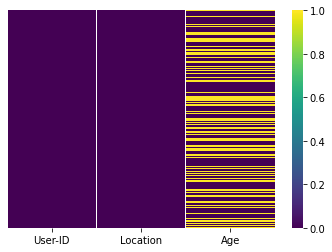

In [21]:
# Let's plot a heatmap to check the Nan values
sns.heatmap(df_users.isnull(), yticklabels = False, cmap = 'viridis')

**Since, the null values are only in "Age" Column.**

Lets check for its distribution.

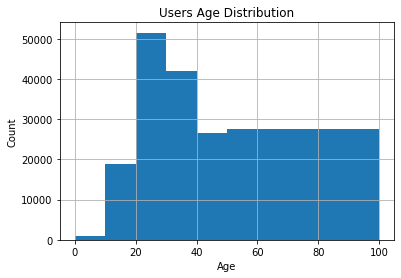

In [22]:
# histogram plot for users age distribution
df_users.Age.hist(bins=[0, 10, 20, 30, 40, 50, 100])
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Users Age Distribution')
plt.show()

**Age from 20 - 40 have the largest count**

Text(0.5, 1.0, 'Outlier data in Age column')

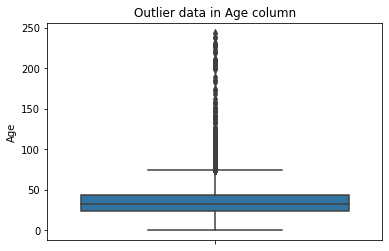

In [23]:
# checking outliers through boxplot
sns.boxplot(y='Age', data=df_users)
plt.title('Outlier data in Age column')

**From the above boxplot we can observe that outliers are present in the Age column in the "Users" dataset.**


In [24]:
# Lets check for the unique values of Location Column
df_users.Location.unique()

array(['nyc, new york, usa', 'stockton, california, usa',
       'moscow, yukon territory, russia', ...,
       'sergnano, lombardia, italy', 'stranraer, n/a, united kingdom',
       'tacoma, washington, united kingdom'], dtype=object)

In [25]:
#Since the Locatin column consists of different values as well
#So lets create another column "Country"
for i in df_users:
 df_users['Country']=df_users.Location.str.extract(r'\,+\s?(\w*\s?\w*)\"*$') #We are eliminating such characters
print(df_users.Country.nunique())


529


In [26]:
df_users.head(3)

,User-ID,Location,Age,Country
0,1,"nyc, new york, usa",NaN,usa
1,2,"stockton, california, usa",18.0,usa
2,3,"moscow, yukon territory, russia",NaN,russia


In [27]:
#Lets drop Location Column
df_users.drop("Location", axis=1, inplace=True)

In [28]:
df_users.head(3)

,User-ID,Age,Country
0,1,NaN,usa
1,2,18.0,usa
2,3,NaN,russia


In [29]:
#Since now the column are set,now we can focus on cleaning Users Dataset
df_users.isnull().sum()

User-ID         0
Age        110762
Country       368
dtype: int64

In [31]:
# Lets change the datatype to str
df_users['Country']=df_users['Country'].astype('str')

In [32]:
a=list(df_users.Country.unique()) # storing the values in list in a variable "a"
a=set(a) #unque values
a=list(a)
a = [x for x in a if x is not None]
a.sort()
print(a)

['', '01776', '02458', '19104', '23232', '30064', '85021', '87510', '_ brasil', 'a', 'aaa', 'adsgfdr', 'afghanistan', 'ahrensburg', 'alachua', 'albania', 'alderney', 'algeria', 'algérie', 'allen', 'ama lurra', 'america', 'american samoa', 'andorra', 'angola', 'antarctica', 'aotearoa', 'argentina', 'armenia', 'aroostook', 'aruba', 'asturies', 'auckland', 'austbritania', 'australia', 'australii', 'austria', 'autralia', 'az', 'azerbaijan', 'bademn würtemberg', 'bahamas', 'bahrain', 'baltimore', 'bangladesh', 'barbados', 'basilicata', 'basque country', 'bavaria', 'baxter', 'bbbzzzzz', 'belarus', 'belgi', 'belgique', 'belgium', 'belize', 'bell', 'benin', 'berguedà', 'bermuda', 'bernalillo', 'bfe', 'bhutan', 'bih', 'bkk', 'bladen', 'bolivia', 'bosnia', 'botswana', 'brasil', 'brazil', 'brunei', 'brunei darussalam', 'bucks', 'bulgaria', 'buncombe', 'burkina faso', 'burkinafasu', 'burlington', 'burma', 'butler', 'c', 'cadd0', 'calabria', 'california', 'cambodia', 'camden', 'cameroon', 'can', 'c

**Since there is a lot of spelling mistake and we have to replace them**

In [33]:
#spelt correction
df_users['Country'].replace(['','01776','02458','19104','23232','30064','85021','87510','alachua','america','austria','autralia','cananda','geermany','italia','united kindgonm','united sates','united staes','united state','united states','us'],
                           ['other','usa','usa','usa','usa','usa','usa','usa','usa','usa','australia','australia','canada','germany','italy','united kingdom','usa','usa','usa','usa','usa'],inplace=True)

Text(0.5, 1.0, 'Count of users Country wise')

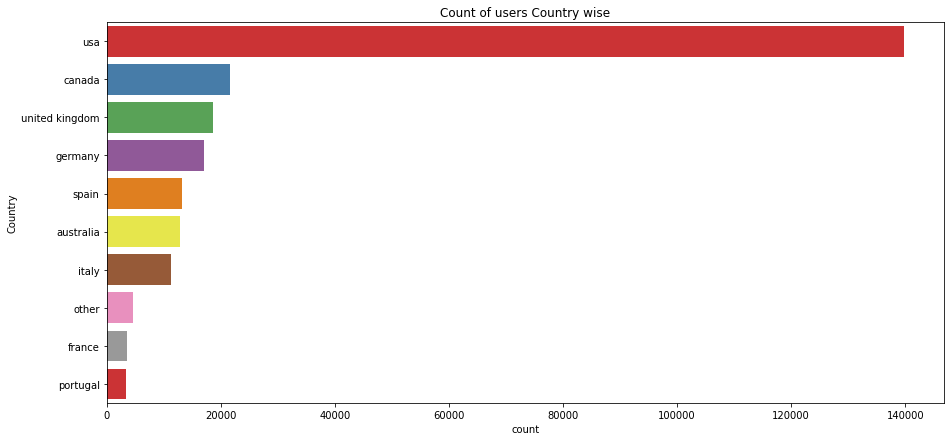

In [34]:
#Lets countplot
plt.figure(figsize=(15,7))
sns.countplot(y='Country',data=df_users,order=pd.value_counts(df_users['Country']).iloc[:10].index, palette='Set1')
plt.title('Count of users Country wise')

**From the coutplot we can see "USA" has the highest count and "Portugal" has the lowest count**

Text(0.5, 1.0, 'Age Distribution Plot')

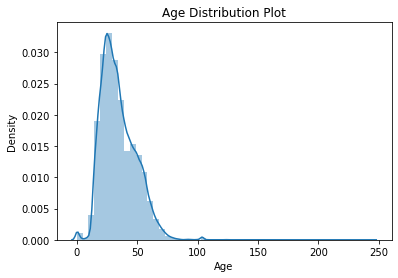

In [35]:
#Lets plot distribution Distplot for Age column
sns.distplot(df_users.Age)
plt.title('Age Distribution Plot')

**Users age above 100 and below 5 does not make much sense for our book rating criteria. So we will replace these values by NaNs.**

**From the above plot we can observe that age has positive Skewness so we can use median to fill Nan but for this we don't like to fill Nan value just for one
range of age. So for that we will use the country column to fill Nan values.**

In [36]:
#outlier data became NaN
df_users.loc[(df_users.Age > 100) | (df_users.Age < 5), 'Age'] = np.nan

In [37]:
df_users.isna().sum()

User-ID         0
Age        112010
Country         0
dtype: int64

In [40]:
df_users['Age'] = df_users['Age'].fillna(df_users.groupby('Country')['Age'].transform('median'))

In [41]:
df_users.isna().sum()

User-ID      0
Age        276
Country      0
dtype: int64

**We still have 276 Nan values in Age Column**

In [42]:
df_users['Age'].fillna(df_users.Age.mean(),inplace=True)

In [43]:
df_users.isna().sum()

User-ID    0
Age        0
Country    0
dtype: int64

**So we have cleaned our Users Dataset**

#EDA

Text(0.5, 1.0, 'Top 10 Publishers')

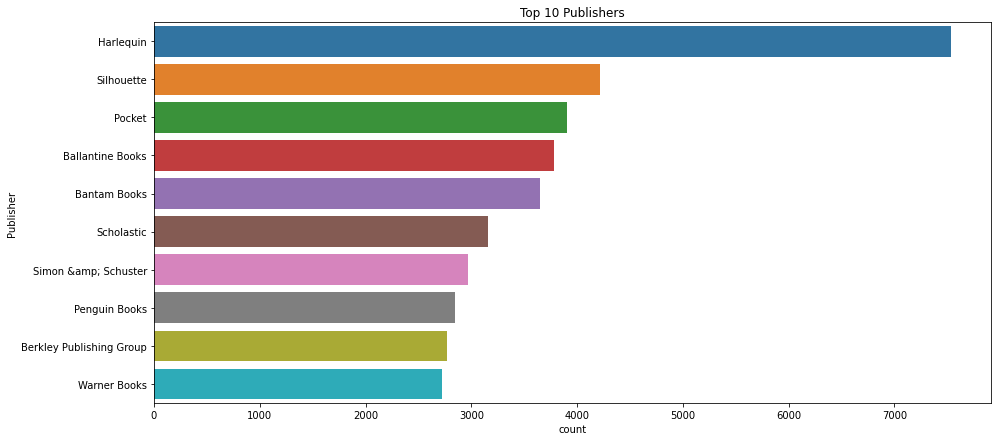

In [44]:
#plot top 10 publishers
plt.figure(figsize=(15,7))
sns.countplot(y='Publisher',data=df_books,order=pd.value_counts(df_books['Publisher']).iloc[:10].index)
plt.title('Top 10 Publishers')

**In this countplot we can see the top Publisher is "Harlequin", while "Warner Books" are on tenth posistion**

Text(0.5, 1.0, 'Top 10 Authors')

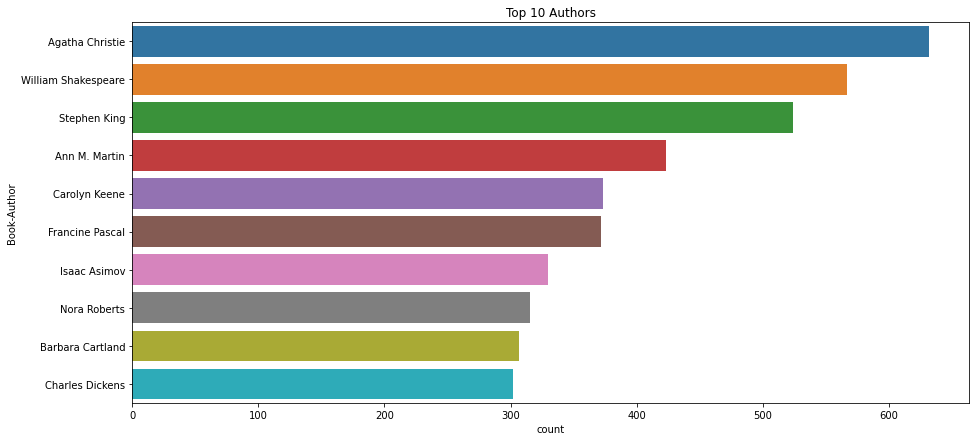

In [45]:
#plot top 10 authors
plt.figure(figsize=(15,7))
sns.countplot(y='Book-Author',data=df_books,order=pd.value_counts(df_books['Book-Author']).iloc[:10].index)
plt.title('Top 10 Authors')

**In this countplot we can see the top Book-Author is "Agatha Christie", while "Charles Dickens" are on tenth posistion**